In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans


In [5]:
# Veriyi yükleme (CSV dosyasını Pandas DataFrame olarak okuma)
customer_data = pd.read_csv('Mall_Customers.csv')

In [6]:
# İlk 5 satırı görüntüleme
print(customer_data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Veri kümesinin boyutunu öğrenme (satır, sütun sayısı)
print(customer_data.shape)

(200, 5)

In [8]:
# Veri kümesi hakkında genel bilgi alma (sütun türleri, eksik değerler vb.)
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Eksik değer kontrolü
print(customer_data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Modelin kullanacağı bağımsız değişkenleri seçme (Annual Income ve Spending Score)
X = customer_data.iloc[:, [3, 4]].values
print(X)

In [ ]:
# WCSS (Within-Cluster Sum of Squares) değerlerini tutacak liste
wcss = []

In [ ]:
# Farklı küme sayıları için WCSS hesaplama
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Küme içi hata kareler toplamını listeye ekle

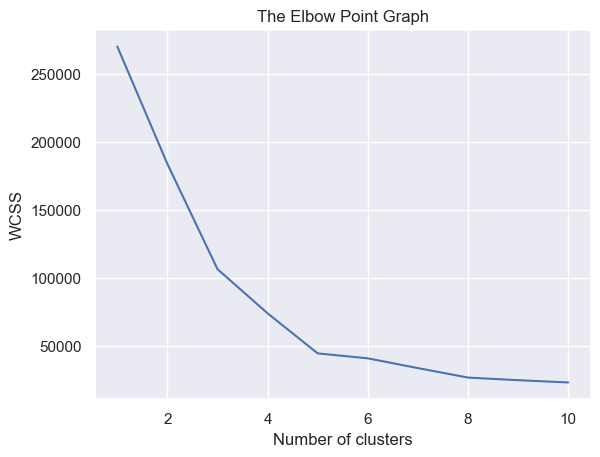

In [14]:

# Elbow yöntemi grafiğini çizme
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Dirsek Yöntemi Grafiği')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS (Küme içi hata kareler toplamı)')
plt.show()

In [15]:
# 5 küme ile K-Means modelini oluşturma
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)  # Veriyi kümelere ayırma
print(Y)  # Küme tahminlerini yazdırma

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


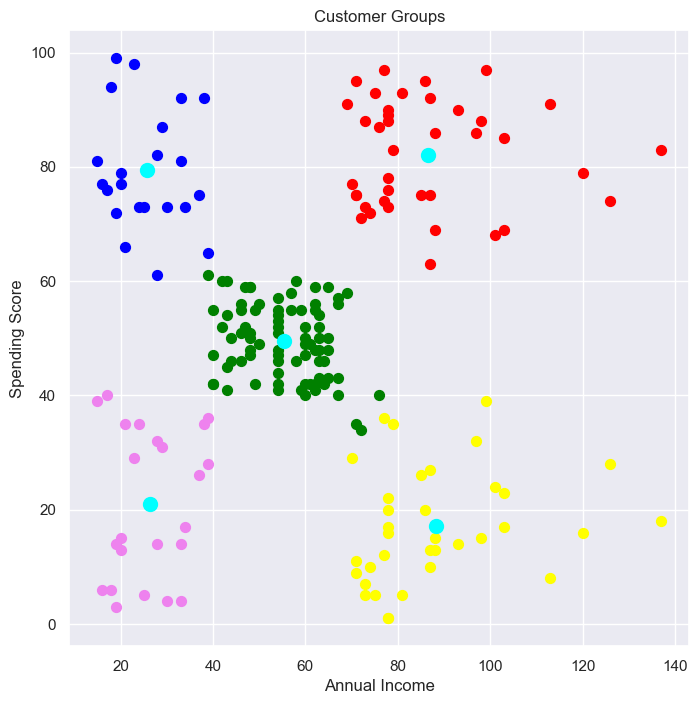

In [ ]:
# Kümeleri görselleştirme
plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Küme 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Küme 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Küme 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Küme 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Küme 5')

# Küme merkezlerini ekleme
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Merkezler')
plt.title('Müşteri Kümeleri')
plt.xlabel('Yıllık Gelir')
plt.ylabel('Harcama Skoru')
plt.legend()
plt.show()

In [18]:
import pickle

# Save the trained model to a file
with open('customer_segmentation_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

print("Model saved successfully!")


Model saved successfully!
